#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 3 (40 marks)**

##Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A3_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 219056512

# Student name: Zhen Cai

## Background

Environment and its changes are the most complex system. It is unarguably accepted that the temperature changes are greately affected by various environmental factors. Many of them are positively related to the  change, whereas, some have negative correlation. In this assesment task, you will analyse relationship among various environmental factors, which affect temperature.

##The dataset

**Dataset file name:** weather_dataset.csv

**Dataset description:** The dataset contains total 10 features. Each row contains an hourly record of weather status and the data was recorded for the time period between 2006 and 2016.

**Features and labels:** 

1.   recording_date_time (date_time): Date and time the data was recorded
2.   precip_type (string): Precipitation status, blank (no value) indicates unknown status
3.   temperature (float): Temperature in degree Celsius
4.   apparent_temperature (float): Feel like temperature in degree Celsius
5.   humidity (float): Percentage amount of water vapour in the air 
6.   wind_speed (float): Speed of the wind in km per hour
7.   wind_bearing (int): The direction of wind in degree in geo-polar co-ordinate. Value 0 means perfect east, 90 means perfect north, 180 and 270 means west and south respectively.
8.   visibility (float): Distance in km that is visible in naked eyes.
9.   cloud_cover (float): The fraction of the sky obscured by clouds. The value is 1 if the observed area is fully cloudy, 0 if no clouds and other fractional value indicates the portion of the area covered by clouds.
10.   pressure (float): Air pressure or atmospheric in milibars


##**Part 1: Linear Regression:**  **(25 marks)**


1.   Load the dataset and split the data for training and testing - consider the data of last 2 years (2015 and 2016) for testing. Now exclude recording_date_time column from both training and test sets. Display the shape of training and test sets. **(3 marks)**

In [1]:
# INSERT your code (or comment) here

import pandas as pd

DataFrame = pd.read_csv('weather_dataset.csv')
DataFrame = DataFrame.sort_values(by = 'recording_date_time')
#print(DataFrame)

#convert categorical data to dummy

dummies = pd.get_dummies(DataFrame['precip_type'])
DataFrame=pd.concat([DataFrame.drop(labels='precip_type',axis=1),dummies],axis=1)
#print(DataFrame)

TestData = DataFrame[DataFrame['recording_date_time'] > '2014-12-31 23:00:00.000 +0100']
TestData = TestData.iloc[:,1:11]
#print(TestData.shape)
#print(TestData)

TrainData = DataFrame[DataFrame['recording_date_time'] <= '2014-12-31 23:00:00.000 +0100']
TrainData = TrainData.iloc[:,1:11]
#print(TrainData.shape)
#print(TrainData)

rows1, cols1 = TestData.shape
rows2, cols2 = TrainData.shape
print("Test data has {} rows with  {} columns".format(rows1, cols1))
print("Train data has {} rows with  {} columns".format(rows2, cols2))

Test data has 17544 rows with  10 columns
Train data has 78909 rows with  10 columns


2.  Consider the 'temperature' as the target. List the insignificant features for predicting temperature, if any. Explain your findings. **(5 marks)**
<br/><font color='green'>**[Hint for students: See the "7.3 Relevance and Covariance among features or variables" for more information.]** <font/>

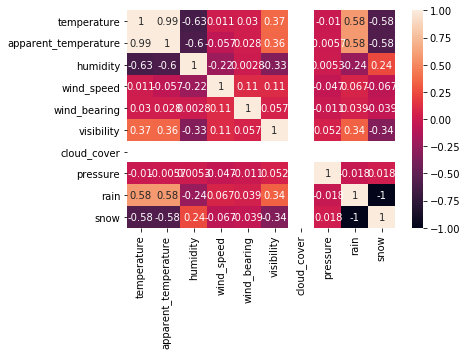

In [3]:
# INSERT your code (or comment) here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Y_train = TrainData.loc[:, ['temperature']]
X_train = TrainData.iloc[:,1:10]
#print(X_train)
#print(Y_train)

#Correlation Matrix
TrainData_CorMatrix = TrainData.corr(method='pearson')
sns.heatmap(TrainData_CorMatrix, annot = True)
plt.show()

#The pressure, cloud_cover, visibility, wind_bearing and wind_speedis not significant correlated with the temperature.
#There is multicollinearity between apparent_temp with humidity, remove humidity.

#The pressure, cloud_cover, wind_bearing and wind_speedis not significantly correlated with the temperature.
#There is multicollinearity between apparent_temp with humidity, remove humidity.

3.  Now create a linear model considering the 'temperature' as the target variable and other columns as features (you can optionally remove non-contributing features). Show the test performance (as Mean Absolute Error, MAE) of the model. **(5 marks)**

In [17]:
# INSERT your code (or comment) here

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

Y_train = TrainData.loc[:, ['temperature']]
X_train = TrainData.iloc[:, [1,5,8,9]]
Y_test = TestData.loc[:, ['temperature']]
X_test = TestData.iloc[:, [1,5,8,9]]
#print(X_train)
#print(X_test)

LinearModel_Q3 = LinearRegression(normalize=True)
LinearModel_Q3.fit(X_train, Y_train)
Y_Pred = LinearModel_Q3.predict(X_test)

#Evaluate our model with Mean Absolute Error
MAE_Q3 = np.mean(abs(Y_Pred - Y_test))
MSE_Q3 = metrics.mean_squared_error(Y_test,Y_Pred)
RMSE_Q3 = np.sqrt(MSE_Q3)
COD_Q3 = metrics.r2_score(Y_test, Y_Pred)

print("Model MAE: {}".format(MAE_Q3[0]))
print("MSE:", MSE_Q3)
print("RMSE:", RMSE_Q3)
print("R-Squared The coefficient of determination:", COD_Q3)

Model MAE: 0.8007968729550398
MSE: 1.0404427422019502
RMSE: 1.0200209518445933
R-Squared The coefficient of determination: 0.9877117363134237


4.   Find the feature which shows maximum correlation with "pressure". Create a linear regression model to predict temperature using these two features ('pressure' and the one which shows maximum correlation). Compare the performance of this simplified model with the model developed in the previous question (Q-3). Explain the performance variation, if any. **(6 marks)**

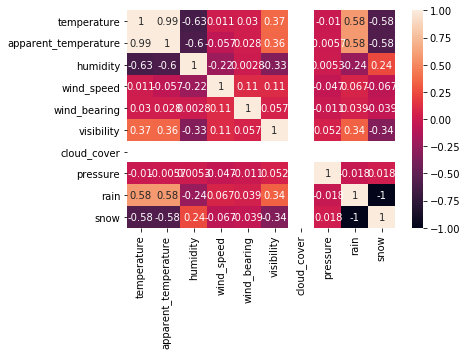

Model MAE: 6.498840791843114
MSE: 64.7674290984127
RMSE: 8.04782138832695
R-Squared The coefficient of determination: 0.23505713983014342


In [19]:
# INSERT your code (or comment) here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression


#Correlation Matrix
TrainData_CorMatrix = TrainData.corr(method='pearson')
sns.heatmap(TrainData_CorMatrix, annot = True)
plt.show()
#Visibility has the greatest correlation with pressure

X_train_Q4 = TrainData.iloc[:, [5,7]]
Y_train_Q4 = TrainData.loc[:, ['temperature']]
X_test_Q4 = TestData.iloc[:, [5,7]]
Y_test_Q4 = TestData.loc[:, ['temperature']]

#print(X_train_Q4)
#print(Y_train_Q4)
#print(X_test_Q4)
#print(Y_test_Q4)


#Fitting linear model & Evaluation

LinearModel_Q4 = LinearRegression(normalize=True)
LinearModel_Q4 .fit(X_train_Q4, Y_train_Q4)
Y_Pred_Q4 = LinearModel_Q4.predict(X_test_Q4)

#Evaluate our model with Mean Absolute Error
MAE_Q4 = np.mean(abs(Y_Pred_Q4 - Y_test_Q4))
MSE_Q4 = metrics.mean_squared_error(Y_test_Q4,Y_Pred_Q4)
RMSE_Q4 = np.sqrt(MSE_Q4)
COD_Q4 = metrics.r2_score(Y_test_Q4, Y_Pred_Q4)

print("Model MAE: {}".format(MAE_Q4[0]))
print("MSE:", MSE_Q4)
print("RMSE:", RMSE_Q4)
print("R-Squared The coefficient of determination:", COD_Q4)

Because the multicollinearity exist in this model which affect the performance of this model. The correlation between X should not bu too high. 

5. Apportion the complete dataset into training and test sets, with an 40-60 split. **(6 marks)**

  (a)  Train a linear regression model without considering overfitting scenario and report the test performance. 
  
  (b) Create an optimal regularised linear regression model and report the test performance.
  
  (c) Explain the reason behind the performance variation, if any.


In [18]:
# INSERT your answer in maximum five sentences.

# A

import numpy as np
from sklearn.model_selection import train_test_split

X = DataFrame.iloc[:,[2,3,4,5,6,8,9,10]]
Y = DataFrame.iloc[:,1]
#print(X)
#print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6)
#print(X_train)
#print(X_test)
#print(Y_train)
#print(Y_test)

LinearModel_Q5 = LinearRegression()  
LinearModel_Q5.fit(X_train, Y_train)
Y_pred = LinearModel_Q5.predict(X_test)

MAE_LR = np.mean(abs(Y_pred - Y_test))
MSE_LR = metrics.mean_squared_error(Y_test,Y_pred)
RMSE_LR = np.sqrt(MSE_LR)
COD_LR = metrics.r2_score(Y_test, Y_pred)

print("Model MAE:", MAE_LR)
print("MSE:", MSE_LR)
print("RMSE:", RMSE_LR)
print("R-Squared The coefficient of determination:", COD_LR)

Model MAE: 0.742367727583815
MSE: 0.9030964147006652
RMSE: 0.9503138506307615
R-Squared The coefficient of determination: 0.9900877324005416


In [27]:
# B

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,RidgeCV

X = DataFrame.iloc[:,[2,3,4,5,6,8,9,10]]
Y = DataFrame.iloc[:,1]
#print(X)
#print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6)
#print(X_train)
#print(X_test)
#print(Y_train)
#print(Y_test)

#create amount of penalisation

penalisation = np.logspace(-5, 5, 300)

#find optimal amount of penalisation by cross_viladiation

ridge_cv = RidgeCV(alphas = penalisation, normalize=True, scoring='neg_mean_squared_error', cv = 10)
ridge_cv.fit(X_train, Y_train)
ridge_best_penalisation = ridge_cv.alpha_
ridge_best_penalisation

RidgeRegression = Ridge(alpha = ridge_best_penalisation, normalize=True)
RidgeRegression.fit(X_train, Y_train)
RidgeRegression_predict = RidgeRegression.predict(X_test)

MAE_Ridge = np.mean(abs(RidgeRegression_predict - Y_test))
MSE_Ridge = metrics.mean_squared_error(Y_test,RidgeRegression_predict)
RMSE_Ridge = np.sqrt(MSE_Ridge)
COD_Ridge = metrics.r2_score(Y_test, RidgeRegression_predict)

print("Model MAE:", MAE_Ridge)
print("MSE:", MSE_Ridge)
print("RMSE:", RMSE_Ridge)
print("R-Squared The coefficient of determination:", COD_Ridge)


#

Model MAE: 0.7436455070962157
MSE: 0.9023440113600019
RMSE: 0.9499178971679615
R-Squared The coefficient of determination: 0.9900843171665947


The performance does not change after optimal regularised so there might be no overfitting issues.

##**Part 2: Logistic Regression:**  **(9 marks)**


1.  Can the same target (temperature, mentioned in Part-1) be used for logistic regression? Why? **(2 marks)**

No, logistic regression is for dummy variables as Y which in this case is rain or snow (1 or 0). Temperature is continous numerical variable which not fit the logistic regression.

2.  Split the dataset as 70-30% for training and testing. Create a logistic regression model to predict the 'precip_type'. Report the prediction accuracy of your model whether the "precip_type" is "rain" or not (use decision threshold of 0.45). **(5 marks)**



In [1]:
# INSERT your code (or comment) here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

DataFrame_P2 = pd.read_csv('weather_dataset.csv')

dummies = pd.get_dummies(DataFrame_P2['precip_type'])
DataFrame_P2=pd.concat([DataFrame_P2.drop(labels='precip_type',axis=1),dummies],axis=1)
#print(DataFrame_P2)

X_P2 = DataFrame_P2.iloc[:,[1,2,3,4,5,6,8]]
Y_P2 = DataFrame_P2.iloc[:,9]

#print(X_P2)
#print(Y_P2)

#Split data 
X_train, X_test, Y_train, Y_test = train_test_split(X_P2, Y_P2, test_size=0.3)

#Model building
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, Y_train)
Y_pred =(LogisticRegression.predict_proba(X_test)[:,1] >= 0.45)

#Evaluating
LogisticAccuracy = accuracy_score(Y_pred, Y_test)
print("Accuracy: ", LogisticAccuracy)
print("Coeff: ",LogisticRegression.coef_)


Accuracy:  0.9807160630356649
Coeff:  [[ 1.10609259e+00 -2.46165674e-01  1.13217757e-01 -6.50035416e-02
   3.68021619e-04  3.36575476e-02 -4.48383782e-04]]


 3.  Discuss the test performance using precision, recall and confusion matrix. **(2 marks)**

In [4]:
# INSERT your code (or comment) here
from sklearn.metrics import precision_score, recall_score, confusion_matrix

#precision_score
print("Precision_score is :",precision_score(Y_pred, Y_test))

#recall_score
print("Recall_score is :",recall_score(Y_pred, Y_test))

#confusion_matrix
print("Confusion_matrix is:") 
print(confusion_matrix(Y_pred, Y_test))

Precision_score is : 0.9983973732556776
Recall_score is : 0.980160405234276
Confusion_matrix is:
[[ 2836    41]
 [  517 25542]]


The precision score shows that among all the predicted result of raining, 99% was correct by using the model.
The recall score shows that among all the test data of rain, 98% were correctly predicted by the model.
The confusing matrics shows that 2836 of data were true positive and 25542 were true negative when testing the model performance. Also it told us that the dataset is not balanced. 

##**Part 3: Objective function optimisation:**  **(6 marks)**

Let’s consider the line graphs shown below and answer the following questions [Hint: See weekly content 7.4-7.10],

<html>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b)</html>

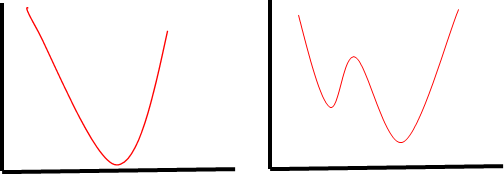





a.  Which of the above figures represents the convex objective function and why? (**1 marks**)

The left one is. Because the left one has been optimized compare to the right one which might be overfiting.

b.  Which hyper-parameter can help to reach the convergence point and the impact of value selection? (**2 marks**)

Weight W. The purpose of training machine learning algorithms is to adjust weight in order to minimize the loss or error. 

c.  How can we find the global minima for the objective function shown in Figure-b? _[N.B. Conceptual description will be accepted.]_ (**3 marks**)

Based on Gradient descent, by calculate the error for each learning iteration we could find the optimized parameter at the lowesr cost position which is also the best performance of the model.